In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import multivariate_normal,norm
# import math
# from hmmlearn import hmm
# import numpy.random as npr
# from pyslds.models import DefaultSLDS
    
# p_old = -10000
# tol = 0.01
# max_iter = 500

# n_dis = 2               # Number of discrete latent states
# n_obs = 2           # Observed data dimension
# n_con = 2        # Latent state dimension
# D_input = 0         # Exogenous input dimension
# n_time = 2000            # Number of time steps to simulate



# true_model = DefaultSLDS(n_dis, n_obs, n_con, D_input)
# inputs = npr.randn(n_time, D_input)
# obs, states_con, states_dis = true_model.generate(n_time, inputs=inputs)
# true_ll = true_model.log_likelihood() 


In [2]:
# # Create a separate model and add the observed data
# test_model = DefaultSLDS(n_dis, n_obs, n_con, D_input)
# test_model.add_data(obs)

# # Run the Gibbs sampler
# N_samples = 10000
# def update(model):
#     model.resample_model()
#     return model.log_likelihood()

# lls = [update(test_model) for _ in range(N_samples)]

In [3]:
# # Plot the log likelihoods
# plt.figure()
# plt.plot([0, N_samples], true_ll * np.ones(2), '--k', label="true")
# plt.plot(np.arange(N_samples), lls, color='b', label="test")
# plt.xlabel("iteration")
# plt.ylabel("training likelihood")
# plt.legend(loc="lower right")

In [4]:
import numpy as np
import numpy.random as npr
from pyslds.models import DefaultSLDS
from pylds.util import random_rotation
import matplotlib.pyplot as plt
K = 2               # Number of discrete latent states
D_obs = 2           # Observed data dimension
D_latent = 2        # Latent state dimension
D_input = 0         # Exogenous input dimension
T = 2000            # Number of time steps to simulate

true_mu_inits = [np.ones(D_latent) for _ in range(K)]
true_sigma_inits = [np.eye(D_latent) for _ in range(K)]
true_As = [.9 * random_rotation(D_latent)
           for k in range(K)]
true_Bs = [3 * npr.randn(D_latent, D_input) for k in range(K)]
true_sigma_states = [np.eye(D_latent) for _ in range(K)]
true_C = np.random.randn(D_obs, D_latent)
true_Ds = np.zeros((D_obs, D_input))
true_sigma_obs = np.eye(D_obs)

# true_model = DefaultSLDS(K, D_obs, D_latent, D_input=D_input)
# inputs = npr.randn(T, D_input)
# obs, states_con, states_dis = true_model.generate(T, inputs=inputs)

true_model = DefaultSLDS(
    K, D_obs, D_latent, D_input=D_input,
    mu_inits=true_mu_inits, sigma_inits=true_sigma_inits,
    As=true_As, Bs=true_Bs, sigma_statess=true_sigma_states,
    Cs=true_C, Ds=true_Ds, sigma_obss=true_sigma_obs)

inputs = npr.randn(T, D_input)
z = np.arange(K).repeat(T // K)


y, x, z = true_model.generate(T, inputs=inputs, stateseq=z)

# Compute the log likelihood of the data with the true params
true_ll = true_model.log_likelihood() 

/Users/shenwang/miniconda3/envs/ml/lib/python3.12/site-packages/pybasicbayes/distributions/multinomial.py:21: UserWarning: using slow sample_crp_tablecounts
  warn('using slow sample_crp_tablecounts')
/Users/shenwang/miniconda3/envs/ml/lib/python3.12/site-packages/pybasicbayes/distributions/negativebinomial.py:25: UserWarning: using slow sample_crp_tablecounts
  warn('using slow sample_crp_tablecounts')


In [5]:
# Create a separate model and add the observed data
test_model = DefaultSLDS(2*K, D_obs, D_latent, D_input,Cs=npr.randn(D_obs, D_latent),
                         Ds=npr.randn(D_obs, D_input))
test_model.add_data(y)

# Run the Gibbs sampler
N_samples = 1000
def update(model):
    model.resample_model()
    return model.log_likelihood()

lls = [update(test_model) for _ in range(N_samples)]

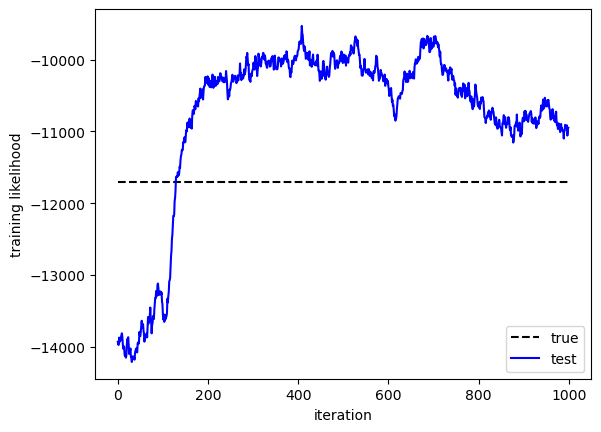

In [6]:
# Plot the log likelihoods
plt.figure()
plt.plot([0, N_samples], true_ll * np.ones(2), '--k', label="true")
plt.plot(np.arange(N_samples), lls, color='b', label="test")
plt.xlabel("iteration")
plt.ylabel("training likelihood")
plt.legend(loc="lower right")

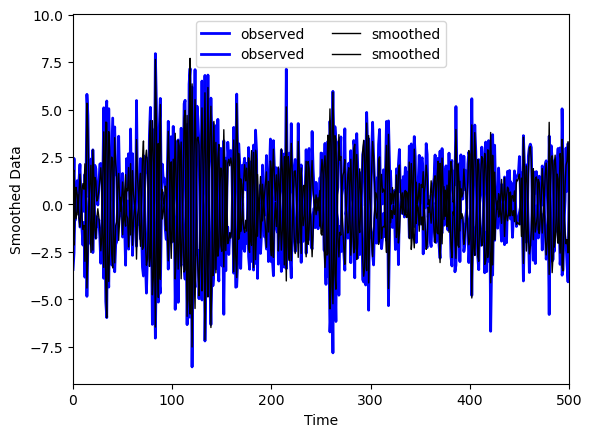

In [7]:
# Smooth the data
smoothed_data = test_model.smooth(y, inputs)

plt.figure()
plt.plot(y, color='b', lw=2, label="observed")
plt.plot(smoothed_data, color='k', lw=1, label="smoothed")
plt.xlabel("Time")
plt.xlim(0, 500)
plt.ylabel("Smoothed Data")
plt.legend(loc="upper center", ncol=2)

In [8]:
true_sigma_states

[array([[1., 0.],
        [0., 1.]]),
 array([[1., 0.],
        [0., 1.]])]

Initializing with Gibbs
.........................  [   25/1000,    0.00sec avg, ETA 3.33 ]
...................

/var/folders/7n/2hstn0kx2mvgvjzthjfyy7280000gn/T/ipykernel_24448/2432813717.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("jet")


......  [   50/1000,    0.00sec avg, ETA 3.55 ]
.........................  [   75/1000,    0.00sec avg, ETA 3.34 ]
.........................  [  100/1000,    0.00sec avg, ETA 3.16 ]
.........................  [  125/1000,    0.00sec avg, ETA 3.07 ]
.........................  [  150/1000,    0.00sec avg, ETA 2.92 ]
.........................  [  175/1000,    0.00sec avg, ETA 2.80 ]
.........................  [  200/1000,    0.00sec avg, ETA 2.68 ]
.........................  [  225/1000,    0.00sec avg, ETA 2.57 ]
.........................  [  250/1000,    0.00sec avg, ETA 2.47 ]
.........................  [  275/1000,    0.00sec avg, ETA 2.37 ]
.........................  [  300/1000,    0.00sec avg, ETA 2.28 ]
.........................  [  325/1000,    0.00sec avg, ETA 2.19 ]
.........................  [  350/1000,    0.00sec avg, ETA 2.10 ]
.........................  [  375/1000,    0.00sec avg, ETA 2.01 ]
.........................  [  400/1000,    0.00sec avg, ETA 1.92 ]
..............

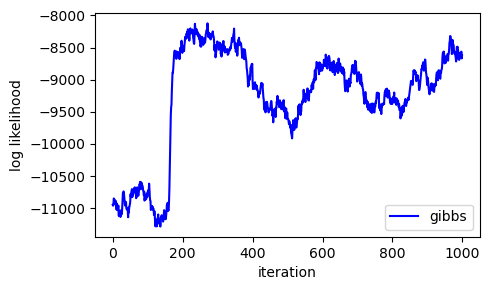

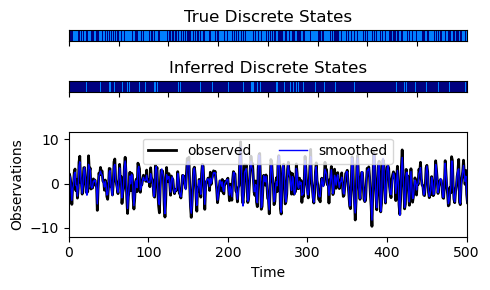

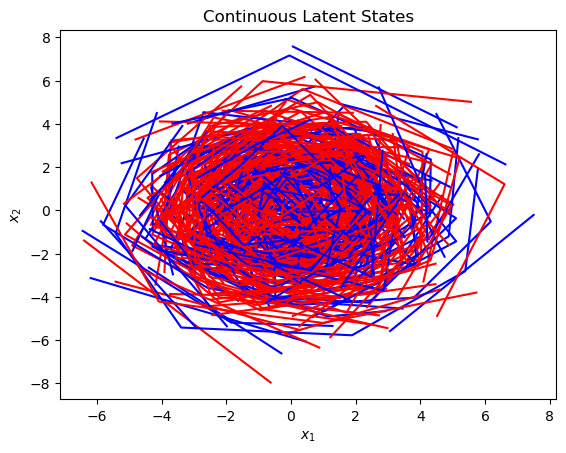

In [9]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Fancy plotting
try:
    import seaborn as sns
    from hips.plotting.colormaps import gradient_cmap
    sns.set_style("white")
    sns.set_context("paper")

    color_names = ["red",
                   "windows blue",
                   "medium green",
                   "dusty purple",
                   "orange",
                   "amber",
                   "clay",
                   "pink",
                   "greyish",
                   "light cyan",
                   "steel blue",
                   "forest green",
                   "pastel purple",
                   "mint",
                   "salmon",
                   "dark brown"]
    colors = sns.xkcd_palette(color_names)
    cmap = gradient_cmap(colors)
except:
    from matplotlib.cm import get_cmap
    colors = ['b', 'r', 'y', 'g', 'purple']
    cmap = get_cmap("jet")


from pybasicbayes.util.text import progprint_xrange
from pylds.util import random_rotation
from pyslds.models import DefaultSLDS

npr.seed(0)

# Set parameters
K = 2
D_obs = 1
D_latent = 2
D_input = 0
T = 2000

# Make an LDS with known parameters
true_mu_inits = [np.ones(D_latent) for _ in range(K)]
true_sigma_inits = [np.eye(D_latent) for _ in range(K)]
true_As = [.9 * random_rotation(D_latent)
           for k in range(K)]
true_Bs = [3 * npr.randn(D_latent, D_input) for k in range(K)]
true_sigma_states = [np.eye(D_latent) for _ in range(K)]
true_C = np.random.randn(D_obs, D_latent)
true_Ds = np.zeros((D_obs, D_input))
true_sigma_obs = np.eye(D_obs)
true_model = DefaultSLDS(
    K, D_obs, D_latent, D_input=D_input,
    mu_inits=true_mu_inits, sigma_inits=true_sigma_inits,
    As=true_As, Bs=true_Bs, sigma_statess=true_sigma_states,
    Cs=true_C, Ds=true_Ds, sigma_obss=true_sigma_obs)

# Simulate some data with a given discrete state sequence
inputs = np.ones((T, D_input))
z = np.arange(K).repeat(T // K)
y, x, z = true_model.generate(T, inputs=inputs, stateseq=z)

# Fit with another LDS.  Give it twice as many states in
# order to have some flexibility during inference.
test_model = DefaultSLDS(K, D_obs, D_latent, D_input,
                         Cs=npr.randn(D_obs, D_latent),
                         Ds=npr.randn(D_obs, D_input))
test_model.add_data(y, inputs=inputs)

# Initialize with Gibbs sampler
print("Initializing with Gibbs")
N_gibbs_samples = 1000
def initialize(model):
    model.resample_model()
    return model.log_likelihood()

gibbs_lls = [initialize(test_model) for _ in progprint_xrange(N_gibbs_samples)]

# Fit with VBEM
# print("Fitting with VBEM")
N_vbem_iters = 100
def update(model):
    model.VBEM_step()
    return model.log_likelihood()

# test_model._init_mf_from_gibbs()
# vbem_lls = [update(test_model) for _ in progprint_xrange(N_vbem_iters)]

# Plot the log likelihoods
plt.figure(figsize=(5,3))
# plt.plot([0, N_gibbs_samples + N_vbem_iters], true_model.log_likelihood() * np.ones(2), '--k', label="true")
plt.plot(np.arange(N_gibbs_samples), gibbs_lls, color=colors[0], label="gibbs")
# plt.plot(np.arange(N_gibbs_samples + 1, N_gibbs_samples + N_vbem_iters), vbem_lls[1:], color=colors[1], label="vbem")
# plt.xlim(0, N_gibbs_samples + N_vbem_iters)
plt.xlabel('iteration')
plt.ylabel('log likelihood')
plt.legend(loc="lower right")
plt.tight_layout()
# plt.savefig("aux/demo_ll.png")

# Smooth the data
smoothed_data = test_model.smooth(y, inputs)

fig = plt.figure(figsize=(5,3))
gs = GridSpec(3, 1, height_ratios=[.1, .1, 1.0])
ax = fig.add_subplot(gs[0,0])
ax.imshow(true_model.states_list[0].stateseq[None,:], vmin=0, vmax=max(len(colors), true_model.num_states)-1,
          cmap=cmap, interpolation="nearest", aspect="auto")
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_title("True Discrete States")

ax = fig.add_subplot(gs[1,0])
ax.imshow(test_model.states_list[0].stateseq[None,:], vmin=0, vmax=max(len(colors), test_model.num_states)-1,
          cmap=cmap, interpolation="nearest", aspect="auto")
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_title("Inferred Discrete States")

ax = fig.add_subplot(gs[2,0])
plt.plot(y[:,0], color='k', lw=2, label="observed")
plt.plot(smoothed_data[:,0], color=colors[0], lw=1, label="smoothed")
plt.xlabel("Time")
plt.xlim(0, min(T, 500))
plt.ylabel("Observations")
plt.legend(loc="upper center", ncol=2)
plt.tight_layout()
# plt.savefig("aux/demo_smooth.png")

plt.figure()
from pyhsmm.util.general import rle
z_rle = rle(z)
offset = 0
for k, dur in zip(*z_rle):
    plt.plot(x[offset:offset+dur,0], x[offset:offset+dur,1], color=colors[k])
    offset += dur

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Continuous Latent States")
plt.show()

In [12]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [13]:
z

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [14]:
test_model.states_list[0].stateseq[None,:]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 

In [15]:
np.sum(np.abs(test_model.states_list[0].stateseq[None,:] - z))

1091